In [20]:
pip install scikit-learn numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

In [22]:
csv_url = r"C:\Users\GIA BAO\OneDrive - Trường ĐH CNTT - University of Information Technology\FPT - Sheet1.csv"

In [23]:
df = pd.read_csv(csv_url, delimiter=';')
print(df)

            Date     Closed       Open        High        Low    Vol  Change
0     30/12/2016  15,852.00  15,707.90   15,942.10  15,617.80  3.79M   1.27%
1     03/01/2017  16,158.20  15,960.10   16,194.30  15,960.10  2.34M   1.93%
2     04/01/2017  16,302.30  16,140.20   16,464.50  16,104.20  2.36M   0.89%
3     05/01/2017  16,248.30  16,284.30   16,356.40  16,248.30  1.42M  -0.33%
4     06/01/2017  16,194.30  16,284.30   16,392.40  16,194.30  1.85M  -0.33%
...          ...        ...        ...         ...        ...    ...     ...
1736  13/12/2023  95,200.00  97,400.00   97,400.00  95,200.00  2.15M  -1.65%
1737  14/12/2023  96,200.00  95,800.00   96,400.00  95,200.00  1.71M   1.05%
1738  15/12/2023  96,200.00  96,200.00   96,300.00  95,000.00  1.47M   0.00%
1739  18/12/2023  94,000.00  95,900.00   96,200.00  93,700.00  2.27M  -2.29%
1740  19/12/2023  94,600.00  99,500.00  100,500.00  93,500.00  1.25M   0.64%

[1741 rows x 7 columns]


In [24]:
# Convert the 'Date' column to datetime with the correct format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

In [25]:
# Remove ',' and convert format
cols_to_convert = ['Closed', 'Open', 'High', 'Low']
df[cols_to_convert] = df[cols_to_convert].replace(',', '', regex=True).astype(float)

# Convert the format of the "Vol" column
def convert_vol(value):
    if 'M' in value:
        return float(value.replace('M', '')) * 1e6
    elif 'K' in value:
        return float(value.replace('K', '')) * 1e3
    else:
        return float(value)

df['Vol'] = df['Vol'].apply(convert_vol)

# Convert the format of the "Change" column
df['Change'] = df['Change'].replace('%', '', regex=True).astype(float) / 100.0
print(df)

             Closed     Open      High      Low        Vol  Change
Date                                                              
2016-12-30  15852.0  15707.9   15942.1  15617.8  3790000.0  0.0127
2017-01-03  16158.2  15960.1   16194.3  15960.1  2340000.0  0.0193
2017-01-04  16302.3  16140.2   16464.5  16104.2  2360000.0  0.0089
2017-01-05  16248.3  16284.3   16356.4  16248.3  1420000.0 -0.0033
2017-01-06  16194.3  16284.3   16392.4  16194.3  1850000.0 -0.0033
...             ...      ...       ...      ...        ...     ...
2023-12-13  95200.0  97400.0   97400.0  95200.0  2150000.0 -0.0165
2023-12-14  96200.0  95800.0   96400.0  95200.0  1710000.0  0.0105
2023-12-15  96200.0  96200.0   96300.0  95000.0  1470000.0  0.0000
2023-12-18  94000.0  95900.0   96200.0  93700.0  2270000.0 -0.0229
2023-12-19  94600.0  99500.0  100500.0  93500.0  1250000.0  0.0064

[1741 rows x 6 columns]


In [26]:
# Identify features and target variables
features = ['Open', 'High', 'Low', 'Vol']
target = 'Closed'

Train-Test-Val Ratio: 7:2:1
Test RMSE: 6259.42496466237
Test MAE: 3960.5020689655194
Test MAPE: 4.37
------------------------------


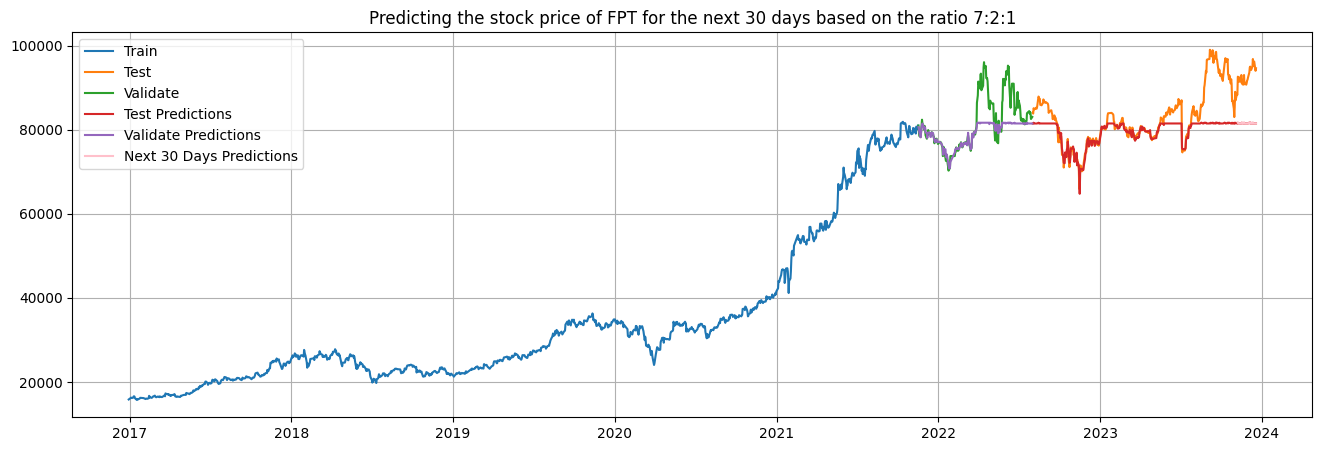

Train-Test-Val Ratio: 6:3:1
Test RMSE: 28944.961798647833
Test MAE: 28150.641593869655
Test MAPE: 33.57
------------------------------


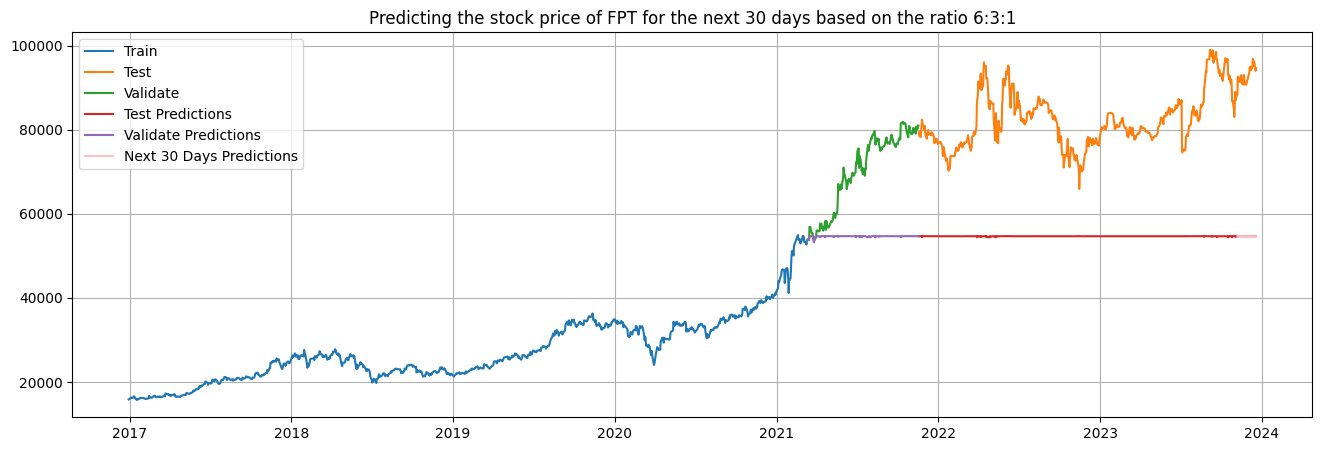

Train-Test-Val Ratio: 5:3:2
Test RMSE: 47284.55812135324
Test MAE: 46803.51973754786
Test MAPE: 56.24
------------------------------


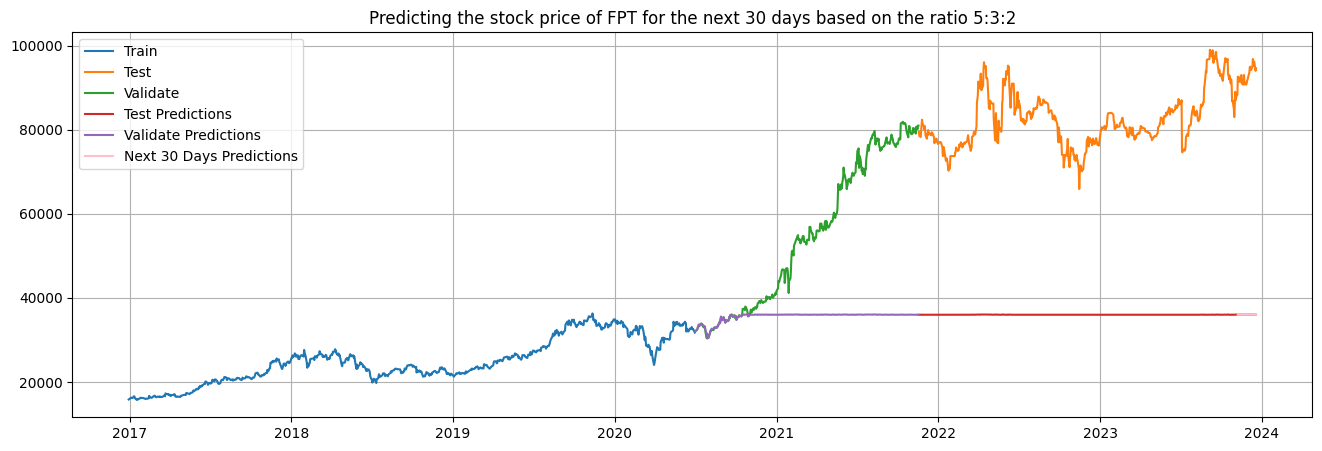

In [28]:
# Initialize lists to store predictions for each ratio
all_train_predictions = []
all_test_predictions = []
all_val_predictions = []

# Drawing plots for all three ratios
ratios = [(7, 2, 1), (6, 3, 1), (5, 3, 2)]

for train_ratio, test_ratio, val_ratio in ratios:
    # Split the data into training, testing, and validation sets
    train_size = int(len(df) * train_ratio / (train_ratio + test_ratio + val_ratio))
    test_size = int(len(df) * test_ratio / (train_ratio + test_ratio + val_ratio))

    train_data, test_data = train_test_split(df, test_size=test_size, shuffle=False)
    train_data, val_data = train_test_split(train_data, test_size=val_ratio / (train_ratio + val_ratio), shuffle=False)

    # Build a Random Forest model
    model = RandomForestRegressor()

    # Train the model
    model.fit(train_data[features], train_data[target])

    # Predict on the training, testing, and validation sets
    train_predictions = model.predict(train_data[features])
    test_predictions = model.predict(test_data[features])
    val_predictions = model.predict(val_data[features])

    # Save predictions for each ratio
    all_train_predictions.append(train_predictions)
    all_test_predictions.append(test_predictions)
    all_val_predictions.append(val_predictions)

    # Calculate evaluation metrics for the testing set
    test_rmse = np.sqrt(mean_squared_error(test_data[target], test_predictions))
    test_mae = mean_absolute_error(test_data[target], test_predictions)
    test_mape = np.mean(np.abs((test_data[target] - test_predictions) / test_data[target])) * 100

    # Calculate evaluation metrics for the training set
    train_rmse = np.sqrt(mean_squared_error(train_data[target], train_predictions))
    train_mae = mean_absolute_error(train_data[target], train_predictions)
    train_mape = np.mean(np.abs((train_data[target] - train_predictions) / train_data[target])) * 100

    # Calculate evaluation metrics for the validation set
    val_rmse = np.sqrt(mean_squared_error(val_data[target], val_predictions))
    val_mae = mean_absolute_error(val_data[target], val_predictions)
    val_mape = np.mean(np.abs((val_data[target] - val_predictions) / val_data[target])) * 100

    # Print result for each ratio
    print(f'Train-Test-Val Ratio: {train_ratio}:{test_ratio}:{val_ratio}')
    print(f'Test RMSE: {test_rmse}')
    print(f'Test MAE: {test_mae}')
    print(f'Test MAPE: {test_mape:.2f}')
    print('-' * 30)

    # Plotting for each ratio
    last_data = df.index[-30:]
    y_pred_test = model.predict(df.loc[last_data][features])

    plt.figure(figsize=(16, 5))
    plt.title(f"Predicting the stock price of FPT for the next 30 days based on the ratio {train_ratio}:{test_ratio}:{val_ratio}")
    plt.grid(True)
    plt.plot(train_data.index, train_data['Closed'])
    plt.plot(test_data.index, test_data['Closed'])
    plt.plot(val_data.index, val_data['Closed'])
    plt.plot(test_data.index, test_predictions)
    plt.plot(val_data.index, val_predictions)
    plt.plot(last_data, y_pred_test, color="pink")
    plt.legend(['Train', 'Test', 'Validate', 'Test Predictions', 'Validate Predictions', 'Next 30 Days Predictions'])
    plt.show()